## SEIS 763 Machine Learning
### Assignment 4
### Due: 4/2/2019
### Submitted by
### Jared Oeth
### Satish Dandayudhapani

1. Load the dataset and split it into a training set (75%) and a test set (25%).

In [1]:
# Import some reqired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
from sklearn.datasets import load_digits
digitsDF = load_digits()

# Features
X = digitsDF.data

# Class variable
y = digitsDF.target

#Splitting the data into Training Set and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


2. Train Logistic Regression model on the dataset, and print the accuracy of the model using the score method.

In [2]:
# Fitting Logistic Regression to Traning Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(multi_class='auto', random_state=0)
classifierObj.fit(X_train, y_train)

# Accuracy of the model
logScore = classifierObj.score(X_test, y_test)

print(logScore)


C:\Users\satis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9622222222222222


3. Train SVM with linear kernel, and print the accuracy of the model.

In [3]:
# Fitting SVM Model to Traning Set

from sklearn.svm import SVC
classifierObj = SVC(kernel='linear', random_state=0)
classifierObj.fit(X_train, y_train)

# Accuracy of the model
svmScore = classifierObj.score(X_test, y_test)

print(svmScore)

0.9733333333333334


4. Write a loop trying different values of degree and train SVM with poly kernel. For every value of degree, you
should have an accuracy. Plot a graph with degree on x-axis and test accuracy on the y-axis. What value of degree
gives you the best accuracy?

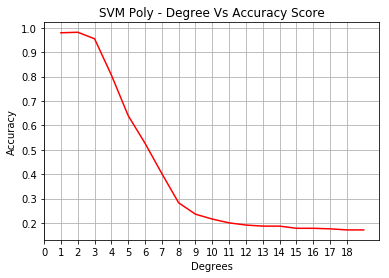

   Degree     Score
1       2  0.982222


In [4]:
# Fitting SVM Poly Model to Traning Set

from sklearn.svm import SVC

score =[]
for n in range(1,20):
    classifierObj = SVC(kernel='poly', degree=n, gamma='scale', random_state=0)
    classifierObj.fit(X_train, y_train)
    
    # Accuracy of the model
    svmScore = classifierObj.score(X_test, y_test)
    score.append([n,svmScore])    
    
scoreDF = pd.DataFrame(data=score, columns = ['Degree', 'Score'])

# Plotting Degree Vs Accuracy Score
xticks = [i for i in range(0, len(scoreDF.Degree))]
# yticks = [i for i in range(0.0, 1.0, 0.1)]
plt.plot(scoreDF.Degree,scoreDF.Score,color='red')
plt.title('SVM Poly - Degree Vs Accuracy Score')
plt.xlabel('Degrees')
plt.ylabel('Accuracy')
plt.xticks(ticks=xticks)
# plt.yticks(ticks=yticks)
plt.grid()
plt.show()

print(scoreDF[scoreDF.Score==max(scoreDF.Score)])
# Degree 2 gives the Best Accuracy with 0.982222 or 98.22%.
    

5. Train SVM with RBF kernel, and print the accuracy of the model.

In [5]:
# Fitting SVM RBF Model to Traning Set

from sklearn.svm import SVC
classifierObj = SVC(gamma='auto',random_state=0)
classifierObj.fit(X_train, y_train)

# Accuracy of the model
svmRbfScore = classifierObj.score(X_test, y_test)

print(svmRbfScore)

0.9844444444444445


6. Write a loop trying different values of k and perform classification using k-NN. For every value of k, you should
have an accuracy. Plot a graph with k on the x-axis and the test accuracy on the y-axis. What value of k gives you
the best accuracy?

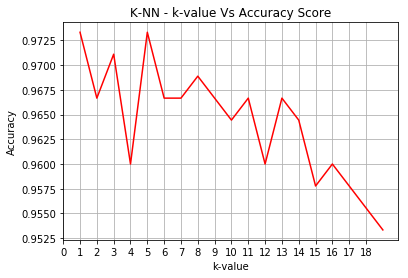

   k_value     Score
0        1  0.973333
4        5  0.973333


In [6]:
# Fitting K-NN Model to Traning Set
from sklearn.neighbors import KNeighborsClassifier
score =[]
for n in range(1,20):
    classifierObj = KNeighborsClassifier(n_neighbors=n)
    classifierObj.fit(X_train, y_train)
    
    # Accuracy of the model
    knnScore = classifierObj.score(X_test, y_test)
    score.append([n,knnScore]) 
    
scoreDF = pd.DataFrame(data=score, columns = ['k_value', 'Score'])

# Plotting Degree Vs Accuracy Score
xticks = [i for i in range(0, len(scoreDF.k_value))]
plt.plot(scoreDF.k_value,scoreDF.Score,color='red')
plt.title('K-NN - k-value Vs Accuracy Score')
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.xticks(ticks=xticks)
plt.grid()
plt.show()

print(scoreDF[scoreDF.Score==max(scoreDF.Score)])
# k-value 1 & 5 gives the Best Accuracy with 0.973333 or 97.33%.

7. Train Naïve Bayes Model, and print the accuracy of the model.

In [7]:
# Fitting Naive Bayes Model to Traning Set
from sklearn.naive_bayes import GaussianNB
classifierObj = GaussianNB()
classifierObj.fit(X_train, y_train)

# Accuracy of the model
naiveBayesScore = classifierObj.score(X_test, y_test)

print(naiveBayesScore)

0.7733333333333333


8. Train Decision Tree, and print the accuracy of the model.

In [8]:
# Fitting Decision TreeModel to Traning Set
from sklearn.tree import DecisionTreeClassifier
classifierObj = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifierObj.fit(X_train,y_train)

# Accuracy of the model
decisionTreeScore = classifierObj.score(X_test, y_test)

print(decisionTreeScore)


0.8244444444444444


9. Write a loop to train Random Forest with different values of n_estimators. For every value of n_estimators you
should have an accuracy. Plot a graph with n_estimators on the x-axis and the test accuracy on the y-axis. What
value of n_estimators gives you the best accuracy?

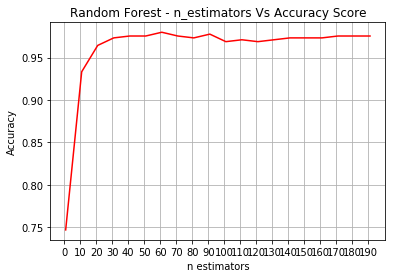

   n_estimators  Score
6            61   0.98


In [9]:
# Fitting Random Forest Model to Traning Set
from sklearn.ensemble import RandomForestClassifier
score =[]
for n in range(1,200,10):
    classifierObj = RandomForestClassifier(n_estimators=n,criterion='entropy', random_state=0)
    classifierObj.fit(X_train,y_train)
    
    # Accuracy of the model
    rfScore = classifierObj.score(X_test, y_test)
    score.append([n,rfScore]) 
    
scoreDF = pd.DataFrame(data=score, columns = ['n_estimators', 'Score'])

# Plotting Degree Vs Accuracy Score
xticks = [i for i in range(0,200,10)]
plt.plot(scoreDF.n_estimators,scoreDF.Score,color='red')
plt.title('Random Forest - n_estimators Vs Accuracy Score')
plt.xlabel('n estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=xticks)
plt.grid()
plt.show()

print(scoreDF[scoreDF.Score==max(scoreDF.Score)])
# n_estimator value 61 gives the Best Accuracy with 0.98 or 98.0%.